In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#对象创建(Series)  
s = pd.Series([1,3,5,np.nan,6,8])

In [5]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [6]:
s.index

RangeIndex(start=0, stop=6, step=1)

In [7]:
dates = pd.date_range('20130101',periods = 6)

In [8]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
#创建一个DataFrame，index为一个日期范围，columns是labels
df = pd.DataFrame(np.random.randn(6,4),index = dates,columns = list('ABCD'))

In [10]:
df

,A,B,C,D
2013-01-01,-0.556679,-1.231626,-0.882409,-0.338803
2013-01-02,-0.761682,0.190232,2.217365,-0.207412
2013-01-03,1.113761,-1.547913,0.797521,0.657625
2013-01-04,-0.152090,0.457178,2.552526,1.921589
2013-01-05,-0.485668,-0.365020,-0.434441,0.711895
2013-01-06,-1.078446,-0.147179,-1.170347,0.421312


In [11]:
#创建一个DataFrame通过传递一个字典对象(可以被转换成series-like)
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index = list(range(4)),dtype = 'float32'),
                   'D':np.array([3]*4,dtype = 'int32'),
                   'E':pd.Categorical(['test','train','test','train']),
                   'F':'foo'})

In [12]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [13]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [14]:
#查看数据
df.head()    #默认查看前五条数据

,A,B,C,D
2013-01-01,-0.556679,-1.231626,-0.882409,-0.338803
2013-01-02,-0.761682,0.190232,2.217365,-0.207412
2013-01-03,1.113761,-1.547913,0.797521,0.657625
2013-01-04,-0.152090,0.457178,2.552526,1.921589
2013-01-05,-0.485668,-0.365020,-0.434441,0.711895


In [16]:
df.tail(3)    #指定查看最后3条数据

,A,B,C,D
2013-01-04,-0.152090,0.457178,2.552526,1.921589
2013-01-05,-0.485668,-0.365020,-0.434441,0.711895
2013-01-06,-1.078446,-0.147179,-1.170347,0.421312


In [18]:
df.index    #查看DataFrame的index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [19]:
df.columns   #查看DataFrame的列号

Index(['A', 'B', 'C', 'D'], dtype='object')

In [21]:
df.values    #查看DataFrame的底层数据

array([[-0.55667929, -1.23162623, -0.88240931, -0.3388026 ],
       [-0.76168172,  0.19023225,  2.21736504, -0.20741165],
       [ 1.1137611 , -1.54791329,  0.79752081,  0.65762453],
       [-0.15209001,  0.45717809,  2.55252641,  1.92158945],
       [-0.4856681 , -0.36502006, -0.43444068,  0.71189513],
       [-1.07844634, -0.14717925, -1.17034687,  0.42131206]])

In [23]:
df.describe()    #显示数据的快速统计摘要

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.320134,-0.440721,0.513369,0.527701
std,0.766505,0.793426,1.601496,0.811945
min,-1.078446,-1.547913,-1.170347,-0.338803
25%,-0.710431,-1.014975,-0.770417,-0.050231
50%,-0.521174,-0.256100,0.181540,0.539468
75%,-0.235485,0.105879,1.862404,0.698327
max,1.113761,0.457178,2.552526,1.921589


In [25]:
df.T     #DataFrame的转置矩阵，行变列，列变行

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.556679,-0.761682,1.113761,-0.152090,-0.485668,-1.078446
B,-1.231626,0.190232,-1.547913,0.457178,-0.365020,-0.147179
C,-0.882409,2.217365,0.797521,2.552526,-0.434441,-1.170347
D,-0.338803,-0.207412,0.657625,1.921589,0.711895,0.421312


In [27]:
#按轴排序
df.sort_index(axis=1,ascending = False)    #sort_index排序，指定axis=1，
                        #表示按列排序，ascending=False表示不升序

,D,C,B,A
2013-01-01,-0.338803,-0.882409,-1.231626,-0.556679
2013-01-02,-0.207412,2.217365,0.190232,-0.761682
2013-01-03,0.657625,0.797521,-1.547913,1.113761
2013-01-04,1.921589,2.552526,0.457178,-0.152090
2013-01-05,0.711895,-0.434441,-0.365020,-0.485668
2013-01-06,0.421312,-1.170347,-0.147179,-1.078446


In [28]:
df.sort_index(axis=0,ascending = False)

,A,B,C,D
2013-01-06,-1.078446,-0.147179,-1.170347,0.421312
2013-01-05,-0.485668,-0.365020,-0.434441,0.711895
2013-01-04,-0.152090,0.457178,2.552526,1.921589
2013-01-03,1.113761,-1.547913,0.797521,0.657625
2013-01-02,-0.761682,0.190232,2.217365,-0.207412
2013-01-01,-0.556679,-1.231626,-0.882409,-0.338803


In [30]:
df.sort_values(by = 'B')    #通过B列的数据进行排序

,A,B,C,D
2013-01-03,1.113761,-1.547913,0.797521,0.657625
2013-01-01,-0.556679,-1.231626,-0.882409,-0.338803
2013-01-05,-0.485668,-0.365020,-0.434441,0.711895
2013-01-06,-1.078446,-0.147179,-1.170347,0.421312
2013-01-02,-0.761682,0.190232,2.217365,-0.207412
2013-01-04,-0.152090,0.457178,2.552526,1.921589


In [31]:
df

,A,B,C,D
2013-01-01,-0.556679,-1.231626,-0.882409,-0.338803
2013-01-02,-0.761682,0.190232,2.217365,-0.207412
2013-01-03,1.113761,-1.547913,0.797521,0.657625
2013-01-04,-0.152090,0.457178,2.552526,1.921589
2013-01-05,-0.485668,-0.365020,-0.434441,0.711895
2013-01-06,-1.078446,-0.147179,-1.170347,0.421312


In [33]:
#选择数据
#获取
df['A']    #相等于df.A    获得了一个Series

2013-01-01   -0.556679
2013-01-02   -0.761682
2013-01-03    1.113761
2013-01-04   -0.152090
2013-01-05   -0.485668
2013-01-06   -1.078446
Freq: D, Name: A, dtype: float64

In [35]:
df[0:3]     #索引前三行的数据

,A,B,C,D
2013-01-01,-0.556679,-1.231626,-0.882409,-0.338803
2013-01-02,-0.761682,0.190232,2.217365,-0.207412
2013-01-03,1.113761,-1.547913,0.797521,0.657625


In [37]:
df['20130102':'20130104']    #索引一个index范围

,A,B,C,D
2013-01-02,-0.761682,0.190232,2.217365,-0.207412
2013-01-03,1.113761,-1.547913,0.797521,0.657625
2013-01-04,-0.152090,0.457178,2.552526,1.921589


In [39]:
#选择标签
df.loc[dates[0]]     #索引第一行数据

A   -0.556679
B   -1.231626
C   -0.882409
D   -0.338803
Name: 2013-01-01 00:00:00, dtype: float64

In [41]:
df.loc[:,['A','B']]    #索引每一行的'A'列与'B'列数据

,A,B
2013-01-01,-0.556679,-1.231626
2013-01-02,-0.761682,0.190232
2013-01-03,1.113761,-1.547913
2013-01-04,-0.152090,0.457178
2013-01-05,-0.485668,-0.365020
2013-01-06,-1.078446,-0.147179


In [44]:
df.loc['20130102':'20130104',['A','B']]    #索引第二行到第四行的'A'列与'B'列的数据

,A,B
2013-01-02,-0.761682,0.190232
2013-01-03,1.113761,-1.547913
2013-01-04,-0.152090,0.457178


In [45]:
df.loc['20130102',['A','B']]

A   -0.761682
B    0.190232
Name: 2013-01-02 00:00:00, dtype: float64

In [46]:
df.loc[dates[0],'A']

-0.5566792927975134

In [47]:
#快速获取一个标量值（相等于前一个操作）
df.at[dates[0],'A']

-0.5566792927975134

In [50]:
#索引通过位置
#通过传递整数的位置进行选择
df.iloc[3]    #索引第四行的数据

A   -0.152090
B    0.457178
C    2.552526
D    1.921589
Name: 2013-01-04 00:00:00, dtype: float64

In [52]:
df.iloc[3:5,0:2]    #索引第3到5行，第0到2列的数据

,A,B
2013-01-04,-0.152090,0.457178
2013-01-05,-0.485668,-0.365020


In [54]:
df.iloc[[1,2,4],[0,2]]    #索引第1、第2、第4行的第0、第2列数据

,A,C
2013-01-02,-0.761682,2.217365
2013-01-03,1.113761,0.797521
2013-01-05,-0.485668,-0.434441


In [56]:
df.iloc[1:3,:]    #索引第1到第3行的每一列数据

,A,B,C,D
2013-01-02,-0.761682,0.190232,2.217365,-0.207412
2013-01-03,1.113761,-1.547913,0.797521,0.657625


In [58]:
df.iloc[:,1:3]    #索引每一行的第1到第3列数据

,B,C
2013-01-01,-1.231626,-0.882409
2013-01-02,0.190232,2.217365
2013-01-03,-1.547913,0.797521
2013-01-04,0.457178,2.552526
2013-01-05,-0.365020,-0.434441
2013-01-06,-0.147179,-1.170347


In [59]:
df.iloc[1,1]

0.1902322545312661

In [60]:
#为了快速访问标量(相当于先前的方法):
df.iat[1,1]

0.1902322545312661

In [62]:
#布尔索引
df[df.A > 0]    #先判断'A'列的数据是否有大于0的，然后索引大于0的那一行数据

,A,B,C,D
2013-01-03,1.113761,-1.547913,0.797521,0.657625


In [66]:
#从满足布尔条件的DataFrame中选择值。
df[df>0]    #大于0的数据会被索引出来，不满足条件的会以NaN填充

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,0.190232,2.217365,NaN
2013-01-03,1.113761,NaN,0.797521,0.657625
2013-01-04,NaN,0.457178,2.552526,1.921589
2013-01-05,NaN,NaN,NaN,0.711895
2013-01-06,NaN,NaN,NaN,0.421312


In [67]:
#使用isin()方法进行过滤
df2 = df.copy()

In [68]:
df2['E'] = ['one','one','two','three','four','three']

In [69]:
df2

,A,B,C,D,E
2013-01-01,-0.556679,-1.231626,-0.882409,-0.338803,one
2013-01-02,-0.761682,0.190232,2.217365,-0.207412,one
2013-01-03,1.113761,-1.547913,0.797521,0.657625,two
2013-01-04,-0.152090,0.457178,2.552526,1.921589,three
2013-01-05,-0.485668,-0.365020,-0.434441,0.711895,four
2013-01-06,-1.078446,-0.147179,-1.170347,0.421312,three


In [71]:
df2[df2['E'].isin(['two','four'])]    #用来判断E列中是'two'和'four'的那一行的数据

,A,B,C,D,E
2013-01-03,1.113761,-1.547913,0.797521,0.657625,two
2013-01-05,-0.485668,-0.365020,-0.434441,0.711895,four


In [72]:
s1 = pd.Series([1,2,3,4,5,6],index = pd.date_range('20130102',periods = 6))

In [73]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [74]:
df['F'] = s1

In [75]:
df

,A,B,C,D,F
2013-01-01,-0.556679,-1.231626,-0.882409,-0.338803,NaN
2013-01-02,-0.761682,0.190232,2.217365,-0.207412,1.0
2013-01-03,1.113761,-1.547913,0.797521,0.657625,2.0
2013-01-04,-0.152090,0.457178,2.552526,1.921589,3.0
2013-01-05,-0.485668,-0.365020,-0.434441,0.711895,4.0
2013-01-06,-1.078446,-0.147179,-1.170347,0.421312,5.0


In [76]:
df.at[dates[0],'A'] = 0

In [77]:
df

,A,B,C,D,F
2013-01-01,0.000000,-1.231626,-0.882409,-0.338803,NaN
2013-01-02,-0.761682,0.190232,2.217365,-0.207412,1.0
2013-01-03,1.113761,-1.547913,0.797521,0.657625,2.0
2013-01-04,-0.152090,0.457178,2.552526,1.921589,3.0
2013-01-05,-0.485668,-0.365020,-0.434441,0.711895,4.0
2013-01-06,-1.078446,-0.147179,-1.170347,0.421312,5.0


In [78]:
df = pd.DataFrame(np.random.randn(8,4),columns = ['A','B','C','D'])

In [79]:
df

,A,B,C,D
0,0.192300,0.234060,-2.469344,0.402870
1,-1.248469,-0.761522,-1.535493,-0.366040
2,0.074454,0.443835,0.659696,-0.952419
3,-0.942868,-0.605933,1.183008,-0.202624
4,-1.619541,0.274375,-1.116791,0.000492
5,-0.463938,0.370085,-1.667585,1.035549
6,1.310949,0.723611,0.734863,-1.434434
7,0.806333,0.301206,0.710018,-0.610154


In [80]:
s = df.iloc[2]

In [81]:
df.append(s,ignore_index = True)

,A,B,C,D
0,0.192300,0.234060,-2.469344,0.402870
1,-1.248469,-0.761522,-1.535493,-0.366040
2,0.074454,0.443835,0.659696,-0.952419
3,-0.942868,-0.605933,1.183008,-0.202624
4,-1.619541,0.274375,-1.116791,0.000492
5,-0.463938,0.370085,-1.667585,1.035549
6,1.310949,0.723611,0.734863,-1.434434
7,0.806333,0.301206,0.710018,-0.610154
8,0.074454,0.443835,0.659696,-0.952419


In [82]:
df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))

In [83]:
df.append(df2)

,A,B
0,1,2
1,3,4
0,5,6
1,7,8


In [86]:
pd.concat([df,df2])

,A,B
0,1,2
1,3,4
0,5,6
1,7,8


In [88]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [89]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [91]:
s1 = pd.Series([1,2,3,4,5,6],index = pd.date_range('20130102',periods = 6))

In [92]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [93]:
df['F'] = s1

In [94]:
df.at[dates[0],'A'] = 0

In [95]:
df

,A,B,C,D,F
2013-01-01,0.000000,-2.066111,0.286772,0.614180,NaN
2013-01-02,-1.593960,0.119776,-0.359093,0.464452,1.0
2013-01-03,0.721719,-0.523378,-0.188945,-1.048695,2.0
2013-01-04,-1.557392,0.909978,-0.130567,0.271107,3.0
2013-01-05,0.512720,0.816680,2.682587,0.782462,4.0
2013-01-06,-0.789785,0.349557,1.781925,0.835435,5.0


In [96]:
df.iat[0,1] = 0

In [97]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.286772,0.614180,NaN
2013-01-02,-1.593960,0.119776,-0.359093,0.464452,1.0
2013-01-03,0.721719,-0.523378,-0.188945,-1.048695,2.0
2013-01-04,-1.557392,0.909978,-0.130567,0.271107,3.0
2013-01-05,0.512720,0.816680,2.682587,0.782462,4.0
2013-01-06,-0.789785,0.349557,1.781925,0.835435,5.0


In [98]:
df.loc[:,'D'] = np.array([5]*len(df))

In [99]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.286772,5,NaN
2013-01-02,-1.593960,0.119776,-0.359093,5,1.0
2013-01-03,0.721719,-0.523378,-0.188945,5,2.0
2013-01-04,-1.557392,0.909978,-0.130567,5,3.0
2013-01-05,0.512720,0.816680,2.682587,5,4.0
2013-01-06,-0.789785,0.349557,1.781925,5,5.0


In [100]:
df2 = df.copy()

In [103]:
df2[df2 > 0] = -df2    #将df2中大于0的数更改为它的相反数

In [102]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.286772,-5,NaN
2013-01-02,-1.593960,-0.119776,-0.359093,-5,-1.0
2013-01-03,-0.721719,-0.523378,-0.188945,-5,-2.0
2013-01-04,-1.557392,-0.909978,-0.130567,-5,-3.0
2013-01-05,-0.512720,-0.816680,-2.682587,-5,-4.0
2013-01-06,-0.789785,-0.349557,-1.781925,-5,-5.0


In [106]:
df2[df2 < 0] = -df2

In [107]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.286772,5,NaN
2013-01-02,1.593960,0.119776,0.359093,5,1.0
2013-01-03,0.721719,0.523378,0.188945,5,2.0
2013-01-04,1.557392,0.909978,0.130567,5,3.0
2013-01-05,0.512720,0.816680,2.682587,5,4.0
2013-01-06,0.789785,0.349557,1.781925,5,5.0


In [111]:
#缺失数据
df1 = df.reindex(index = dates[0:4],columns = list(df.columns)+['E'])

In [112]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.286772,5,NaN,NaN
2013-01-02,-1.593960,0.119776,-0.359093,5,1.0,NaN
2013-01-03,0.721719,-0.523378,-0.188945,5,2.0,NaN
2013-01-04,-1.557392,0.909978,-0.130567,5,3.0,NaN


In [114]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [115]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.286772,5,NaN,1.0
2013-01-02,-1.593960,0.119776,-0.359093,5,1.0,1.0
2013-01-03,0.721719,-0.523378,-0.188945,5,2.0,NaN
2013-01-04,-1.557392,0.909978,-0.130567,5,3.0,NaN


In [116]:
#删除任何缺少数据的行
df1.dropna(how = 'any')

,A,B,C,D,F,E
2013-01-02,-1.59396,0.119776,-0.359093,5,1.0,1.0


In [117]:
#填充缺失的数据
df1.fillna(value = 5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.286772,5,5.0,1.0
2013-01-02,-1.593960,0.119776,-0.359093,5,1.0,1.0
2013-01-03,0.721719,-0.523378,-0.188945,5,2.0,5.0
2013-01-04,-1.557392,0.909978,-0.130567,5,3.0,5.0


In [118]:
#获取值为nan的布尔类型的DataFrame
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [119]:
#运算
#统计
#运算通常排除缺失数据
df.mean()    #计算每一列的平均值

A   -0.451116
B    0.278769
C    0.678780
D    5.000000
F    3.000000
E    1.000000
dtype: float64

In [120]:
df.mean(1)    #计算每一行的平均值

2013-01-01    1.257354
2013-01-02    0.861120
2013-01-03    1.401879
2013-01-04    1.444404
2013-01-05    2.602397
2013-01-06    2.268339
Freq: D, dtype: float64

In [121]:
s = pd.Series([1,3,5,np.nan,6,8],index = dates).shift(2)

In [122]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [123]:
df.sub(s,axis = 'index')

,A,B,C,D,F,E
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.278281,-1.523378,-1.188945,4.0,1.0,NaN
2013-01-04,-4.557392,-2.090022,-3.130567,2.0,0.0,NaN
2013-01-05,-4.487280,-4.183320,-2.317413,0.0,-1.0,NaN
2013-01-06,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
df

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.286772,5,NaN,1.0
2013-01-02,-1.593960,0.119776,-0.359093,5,1.0,1.0
2013-01-03,0.721719,-0.523378,-0.188945,5,2.0,NaN
2013-01-04,-1.557392,0.909978,-0.130567,5,3.0,NaN
2013-01-05,0.512720,0.816680,2.682587,5,4.0,NaN
2013-01-06,-0.789785,0.349557,1.781925,5,5.0,NaN


In [144]:
df.sub(s,axis= 'index')

,A,B,C,D,F,E
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.278281,-1.523378,-1.188945,4.0,1.0,NaN
2013-01-04,-4.557392,-2.090022,-3.130567,2.0,0.0,NaN
2013-01-05,-4.487280,-4.183320,-2.317413,0.0,-1.0,NaN
2013-01-06,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
a = pd.DataFrame([2,1,1,np.nan],index= ['a','b','c','d'],
                columns = ['one'])

In [134]:
a

,one
a,2.0
b,1.0
c,1.0
d,NaN


In [141]:
b = pd.DataFrame(dict(one = [1,np.nan,1,np.nan],
                     two = [3,2,np.nan,2]),
                     index = ['a','b','d','e'])

In [142]:
b

,one,two
a,1.0,3.0
b,NaN,2.0
d,1.0,NaN
e,NaN,2.0


In [143]:
a.sub(b,fill_value = 0)

,one,two
a,1.0,-3.0
b,1.0,-2.0
c,1.0,NaN
d,-1.0,NaN
e,NaN,-2.0


In [147]:
#应用
#将函数应用于数据
df.apply(np.cumsum)    #每一列逐步相加

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.286772,5,NaN,1.0
2013-01-02,-1.593960,0.119776,-0.072322,10,1.0,2.0
2013-01-03,-0.872241,-0.403603,-0.261266,15,3.0,NaN
2013-01-04,-2.429633,0.506375,-0.391833,20,6.0,NaN
2013-01-05,-1.916913,1.323055,2.290754,25,10.0,NaN
2013-01-06,-2.706698,1.672613,4.072679,30,15.0,NaN


In [146]:
df

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.286772,5,NaN,1.0
2013-01-02,-1.593960,0.119776,-0.359093,5,1.0,1.0
2013-01-03,0.721719,-0.523378,-0.188945,5,2.0,NaN
2013-01-04,-1.557392,0.909978,-0.130567,5,3.0,NaN
2013-01-05,0.512720,0.816680,2.682587,5,4.0,NaN
2013-01-06,-0.789785,0.349557,1.781925,5,5.0,NaN


In [150]:
df.apply(lambda x:x.max()-x.min())    #将每一列的最大值减去最小值

A    2.315679
B    1.433356
C    3.041680
D    0.000000
F    4.000000
E    0.000000
dtype: float64

In [151]:
s = pd.Series(np.random.randint(0,7,size=10))

In [152]:
s

0    3
1    2
2    5
3    3
4    1
5    4
6    5
7    1
8    1
9    1
dtype: int32

In [154]:
s.value_counts()    #Series中每个值出现的次数

1    4
5    2
3    2
4    1
2    1
dtype: int64

In [155]:
#字符串方法
s = pd.Series(['A','B','C','Aaba','Baca',np.nan,'CABA','dog','cat'])

In [157]:
s.str.lower()    #将Series中的所有字母小写话

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [158]:
#Merge 合并
#Concat 合并多个数组
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-0.993283,-0.123192,1.699049,-1.149857
1,0.521139,0.777148,-0.009147,0.380237
2,2.175672,0.276493,-1.983042,-1.935791
3,0.235291,0.613337,-0.723737,-1.231099
4,0.565389,0.890979,-0.163110,-1.578479
5,0.748433,0.729431,1.864127,0.121522
6,-0.595085,0.123932,-1.720796,-0.693573
7,0.131637,-0.050165,-1.766942,1.228073
8,-0.058872,-1.847543,-0.375475,0.923386
9,-2.166087,-2.304248,1.108284,-0.211111


In [159]:
pieces = [df[:3],df[3:7],df[7:]]

In [163]:
pd.concat(pieces)    #垂直合并pandas对象

,0,1,2,3
0,-0.993283,-0.123192,1.699049,-1.149857
1,0.521139,0.777148,-0.009147,0.380237
2,2.175672,0.276493,-1.983042,-1.935791
3,0.235291,0.613337,-0.723737,-1.231099
4,0.565389,0.890979,-0.163110,-1.578479
5,0.748433,0.729431,1.864127,0.121522
6,-0.595085,0.123932,-1.720796,-0.693573
7,0.131637,-0.050165,-1.766942,1.228073
8,-0.058872,-1.847543,-0.375475,0.923386
9,-2.166087,-2.304248,1.108284,-0.211111


In [165]:
pd.concat(pieces,axis=1)    #axis=1设置横向拼接

,0,1,2,3,0,1,2,3,0,1,2,3
0,-0.993283,-0.123192,1.699049,-1.149857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.521139,0.777148,-0.009147,0.380237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.175672,0.276493,-1.983042,-1.935791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.235291,0.613337,-0.723737,-1.231099,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.565389,0.890979,-0.163110,-1.578479,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,0.748433,0.729431,1.864127,0.121522,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,-0.595085,0.123932,-1.720796,-0.693573,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.131637,-0.050165,-1.766942,1.228073
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.058872,-1.847543,-0.375475,0.923386
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.166087,-2.304248,1.108284,-0.211111


In [166]:
#join
#SQL样式合并
left = pd.DataFrame({'key':['foo','foo'],'lval':[1,2]})
right = pd.DataFrame({'key':['foo','foo'],'rval':[4,5]})

In [167]:
left

,key,lval
0,foo,1
1,foo,2


In [168]:
right

,key,rval
0,foo,4
1,foo,5


In [176]:
pd.merge(left,right,on = 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [177]:
left = pd.DataFrame({'key':['foo','bar'],'lval':[1,2]})
right = pd.DataFrame({'key':['foo','bar'],'rval':[4,5]})

In [178]:
left

,key,lval
0,foo,1
1,bar,2


In [179]:
right

,key,rval
0,foo,4
1,bar,5


In [180]:
pd.merge(left,right,on = 'key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [181]:
#Append
#将行附加到dataframe中
df = pd.DataFrame(np.random.randn(8,4),columns = ['A','B','C','D'])

In [182]:
df

,A,B,C,D
0,1.399434,-0.210379,-0.327296,-0.564423
1,0.142938,0.004432,-0.463094,0.102222
2,-1.103616,-0.611656,0.053002,-0.794031
3,0.800520,0.618343,0.424654,-0.306153
4,1.821311,1.343590,0.205065,0.342827
5,-1.200211,-1.305152,-1.717554,-1.071109
6,-0.302870,-1.219587,-0.271635,1.300273
7,-0.847869,0.332742,-1.884699,0.508630


In [183]:
s = df.iloc[3]

In [186]:
df.append(s,ignore_index = True)    #将Series添加到DataFrame的最后一行，并忽略索引

,A,B,C,D
0,1.399434,-0.210379,-0.327296,-0.564423
1,0.142938,0.004432,-0.463094,0.102222
2,-1.103616,-0.611656,0.053002,-0.794031
3,0.800520,0.618343,0.424654,-0.306153
4,1.821311,1.343590,0.205065,0.342827
5,-1.200211,-1.305152,-1.717554,-1.071109
6,-0.302870,-1.219587,-0.271635,1.300273
7,-0.847869,0.332742,-1.884699,0.508630
8,0.800520,0.618343,0.424654,-0.306153


In [187]:
#Grouping
#“group By”指的是涉及以下一个或多个步骤的过程:
    #根据一些标准将数据分成组
    #分别对每个组应用一个函数
    #将结果组合成数据结构
df = pd.DataFrame({'A':['foo','bar','foo','bar','foo','bar','foo','foo'],
                  'B':['one','one','two','three','two','two','one','three'],
                  'C':np.random.randn(8),
                  'D':np.random.randn(8)})

In [188]:
df

,A,B,C,D
0,foo,one,0.589378,-0.051679
1,bar,one,-0.088033,-0.329134
2,foo,two,-0.730196,1.950207
3,bar,three,0.907644,0.220764
4,foo,two,-0.907454,-0.713460
5,bar,two,0.356335,0.377218
6,foo,one,0.355624,1.198296
7,foo,three,-0.402775,-0.628704


In [190]:
#分组，然后将sum()函数应用到结果组
df.groupby('A').sum()    #通过'A'列的数据分组，然后对有数据的列应用求和函数

,C,D
A,,
bar,1.175947,0.268848
foo,-1.095422,1.754660


In [192]:
#通过多列的分组形成层次索引，我们可以再次应用求和函数。
df.groupby(['A','B']).sum()    #先将数据通过'A'列分组，再通过'B'列分组，最后应用求和函数

C         D
A   B                        
bar one   -0.088033 -0.329134
    three  0.907644  0.220764
    two    0.356335  0.377218
foo one    0.945002  1.146616
    three -0.402775 -0.628704
    two   -1.637649  1.236748

In [193]:
#Reshaping
tuples = list(zip(*[['bar','bar','baz','baz','foo','foo','qux','qux'],
                   ['one','two','one','two','one','two','one','two']]))

In [194]:
index = pd.MultiIndex.from_tuples(tuples,names = ['first','second'])

In [195]:
df = pd.DataFrame(np.random.randn(8,2),index = index,columns = ['A','B'])

In [196]:
df2 = df[:4]

In [197]:
df2

A         B
first second                    
bar   one    -0.482895 -0.808462
      two    -0.450214  1.610143
baz   one    -0.845022  0.009219
      two    -0.107902 -1.563752

In [203]:
#tack()方法“压缩”DataFrame列中的一个级别。
stacked = df2.stack()

In [204]:
stacked

first  second   
bar    one     A   -0.482895
               B   -0.808462
       two     A   -0.450214
               B    1.610143
baz    one     A   -0.845022
               B    0.009219
       two     A   -0.107902
               B   -1.563752
dtype: float64

In [208]:
#对于“堆叠”的DataFrame或Series(有一个多索引作为索引)，
#stack()的逆操作是unstack()，默认情况下，unstack()是最后一层:
stacked.unstack(-1)

A         B
first second                    
bar   one    -0.482895 -0.808462
      two    -0.450214  1.610143
baz   one    -0.845022  0.009219
      two    -0.107902 -1.563752

In [206]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.482895 -0.450214
      B -0.808462  1.610143
baz   A -0.845022 -0.107902
      B  0.009219 -1.563752

In [210]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.482895 -0.845022
       B -0.808462  0.009219
two    A -0.450214 -0.107902
       B  1.610143 -1.563752

In [211]:
#Pivot Tables 数据透视表
df = pd.DataFrame({'A':['one','one','two','three']*3,
                  'B':['A','B','C']*4,
                  'C':['foo','foo','foo','bar','bar','bar']*2,
                  'D':np.random.randn(12),
                  'E':np.random.randn(12)})

In [212]:
df

,A,B,C,D,E
0,one,A,foo,-0.122267,-0.257171
1,one,B,foo,-2.862614,0.954817
2,two,C,foo,2.200218,0.692039
3,three,A,bar,-1.108532,0.401311
4,one,B,bar,1.663565,-2.077725
5,one,C,bar,-1.196512,1.269212
6,two,A,foo,-0.706037,-1.103252
7,three,B,foo,-0.660128,-0.847895
8,one,C,foo,-0.466317,1.258416
9,one,A,bar,-0.384697,-0.304814


In [215]:
#我们可以很容易地从这些数据生成数据透视表:
pd.pivot_table(df,values = 'D',index =['A','B'],columns = ['C'])
#数据值是'D'列，index是['A','B']两列，columns是'C'列

C             bar       foo
A     B                    
one   A -0.384697 -0.122267
      B  1.663565 -2.862614
      C -1.196512 -0.466317
three A -1.108532       NaN
      B       NaN -0.660128
      C  0.642738       NaN
two   A       NaN -0.706037
      B -1.447996       NaN
      C       NaN  2.200218

In [216]:
#Time Series 时间序列
rng = pd.date_range('1/1/2012',periods = 100,freq = 'S')
ts = pd.Series(np.random.randint(0,500,len(rng)),index = rng)

In [218]:
ts.resample('5Min').sum()

2012-01-01    25016
Freq: 5T, dtype: int32

In [221]:
#时区表示
rng = pd.date_range('3/6/2012 00:00',periods = 5,freq = 'D')
ts = pd.Series(np.random.randn(len(rng)),rng)

In [222]:
ts

2012-03-06   -0.849135
2012-03-07   -2.011370
2012-03-08    0.009256
2012-03-09   -3.569876
2012-03-10    0.156553
Freq: D, dtype: float64

In [223]:
ts_utc = ts.tz_localize('UTC')

In [224]:
ts_utc

2012-03-06 00:00:00+00:00   -0.849135
2012-03-07 00:00:00+00:00   -2.011370
2012-03-08 00:00:00+00:00    0.009256
2012-03-09 00:00:00+00:00   -3.569876
2012-03-10 00:00:00+00:00    0.156553
Freq: D, dtype: float64

In [225]:
#转换到另一个时区
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.849135
2012-03-06 19:00:00-05:00   -2.011370
2012-03-07 19:00:00-05:00    0.009256
2012-03-08 19:00:00-05:00   -3.569876
2012-03-09 19:00:00-05:00    0.156553
Freq: D, dtype: float64

In [226]:
#时间跨度表示之间的转换:
rng = pd.date_range('1/1/2012',periods=5,freq = 'M')
ts = pd.Series(np.random.randn(len(rng)),index = rng)

In [227]:
ts

2012-01-31   -1.068447
2012-02-29   -0.058222
2012-03-31   -1.247807
2012-04-30   -1.781726
2012-05-31   -0.206048
Freq: M, dtype: float64

In [228]:
ps = ts.to_period()

In [229]:
ps

2012-01   -1.068447
2012-02   -0.058222
2012-03   -1.247807
2012-04   -1.781726
2012-05   -0.206048
Freq: M, dtype: float64

In [230]:
ps.to_timestamp()

2012-01-01   -1.068447
2012-02-01   -0.058222
2012-03-01   -1.247807
2012-04-01   -1.781726
2012-05-01   -0.206048
Freq: MS, dtype: float64

In [231]:
#期间和时间戳之间的转换允许使用一些方便的算术函数。在下面的示例中，
#我们将一个季度频率(截止到11月的年份)转换为季度结束后一个月末的9点:
prng = pd.period_range('1990Q1','2000Q4',freq = 'Q-NOV')
ts = pd.Series(np.random.randn(len(prng)),prng)

In [234]:
ts.index = (prng.asfreq('M','e')+1).asfreq('H','s')+9

In [235]:
ts.head()

1990-03-01 09:00   -0.023215
1990-06-01 09:00    0.114136
1990-09-01 09:00   -0.440470
1990-12-01 09:00    0.276058
1991-03-01 09:00    1.057674
Freq: H, dtype: float64

In [240]:
#Categoricals    观察断言句
df = pd.DataFrame({'id':[1,2,3,4,5,6],'raw_grade':['a','b','b','a','a','e']})

In [241]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [245]:
#将原始等级转换为分类数据类型
df['grade'] = df['raw_grade'].astype('category')

In [246]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [247]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [248]:
#将类别重命名为更有意义的名称(分配到Series.categories)在原地!)。
df['grade'].cat.categories = ['very good','good','very bad']

In [250]:
#重新排序类别并同时添加缺失的类别
#(默认情况下，Series .cat下的方法返回一个新系列)。
df['grade'] = df['grade'].cat.set_categories(['very bad','bad','medium','good','very good'])
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [251]:
#排序是按类别中的顺序排序，而不是按词法顺序排序。
df.sort_values(by = 'grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [252]:
#按类别列分组也显示空类别。
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [254]:
#Plotting 绘图
ts = pd.Series(np.random.randn(1000),index = pd.date_range('1/1/2000',periods = 1000))
ts.head()

2000-01-01    0.818197
2000-01-02   -0.215193
2000-01-03   -0.143629
2000-01-04   -0.547592
2000-01-05   -1.183927
Freq: D, dtype: float64

In [255]:
ts = ts.cumsum()

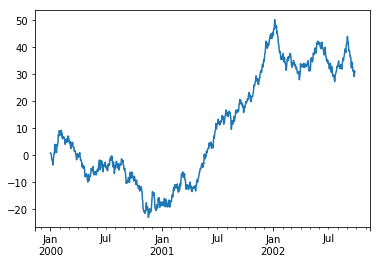

In [258]:
ts.plot()

In [259]:
#在DataFrame上,plot()方法是一个方便地将所有列与标签组合在一起:
df = pd.DataFrame(np.random.randn(1000,4),index = ts.index,
                 columns = ['A','B','C','D'])

In [260]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

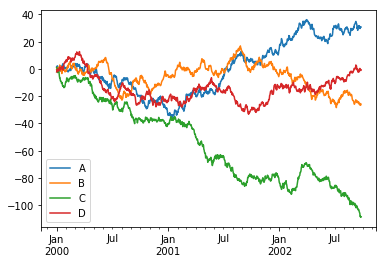

In [261]:
plt.figure();df.plot();plt.legend(loc = 'best')

In [262]:
#获取数据/输出数据
#CSV
#写入csv文件。
df.to_csv(r'e:\python4\foo.csv')

In [265]:
#从csv文件中读取。
a = pd.read_csv(r'e:\python4\foo.csv')

In [266]:
a.head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.520607,-0.619631,1.068020,-2.246435
1,2000-01-02,1.534468,-0.857080,0.654164,-0.958128
2,2000-01-03,2.261866,1.026031,-0.595254,-0.274091
3,2000-01-04,1.927849,0.566542,-2.687645,-0.998866
4,2000-01-05,1.284163,1.008617,-1.867793,-1.139889


In [267]:
#HDF5
#读写HDFStores。
#写入HDF5
df.to_hdf(r'e:\python4\foo.h5','df')

In [268]:
b = pd.read_hdf(r'e:\python4\foo.h5','df')

In [269]:
b.head()

,A,B,C,D
2000-01-01,1.520607,-0.619631,1.068020,-2.246435
2000-01-02,1.534468,-0.857080,0.654164,-0.958128
2000-01-03,2.261866,1.026031,-0.595254,-0.274091
2000-01-04,1.927849,0.566542,-2.687645,-0.998866
2000-01-05,1.284163,1.008617,-1.867793,-1.139889


In [270]:
#Excel
#读写Excel
#写入Excel文件
df.to_excel(r'e:\python4\foo.xlsx',sheet_name = 'Sheet1')

In [ ]:
#从Excel文件读取
pd.read_excel(r'e:\python4\foo.xlsx','She')